In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.neighbors import KNeighborsClassifier
import cmath 
import numpy as geek
import cmath, math, numpy

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
file = open("TrainData.pkl", 'rb')
Xd = pickle.load(file, encoding = 'bytes')
snrs, mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1, 0])
X = [] 
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod, snr)])
        for i in range(Xd[(mod, snr)].shape[0]):  lbl.append((mod))#lbl.append((mod, snr))
X = np.vstack(X)
file.close()

In [15]:
X

array([[[-0.00716379, -0.00241632,  0.00063237, ..., -0.00422343,
          0.00362227,  0.00533994],
        [-0.00166505, -0.00144848, -0.01196972, ...,  0.00389698,
         -0.0052103 , -0.0007378 ]],

       [[ 0.00645143, -0.00212428, -0.00706135, ..., -0.00565343,
         -0.00104959, -0.00529411],
        [ 0.00329197, -0.00067204, -0.00282152, ...,  0.00315403,
         -0.00091081, -0.00107325]],

       [[ 0.00505826,  0.00445021, -0.00706326, ..., -0.00086023,
         -0.00832456, -0.00439183],
        [ 0.00454194,  0.00554406, -0.00336223, ...,  0.01007818,
          0.00437446,  0.00157776]],

       ...,

       [[ 0.00090855,  0.00091193,  0.00096988, ...,  0.00087493,
          0.00092356,  0.00105166],
        [-0.00778397, -0.00787711, -0.00781963, ..., -0.00772037,
         -0.00776644, -0.00776909]],

       [[ 0.0009345 ,  0.00097915,  0.00097718, ...,  0.000949  ,
          0.0010655 ,  0.00105054],
        [-0.00771043, -0.00773856, -0.00780745, ..., -0.00780

In [3]:
features        = {}
features['raw'] = X[:, 0], X[:, 1]

In [13]:
features

{'raw': (array([[-0.00716379, -0.00241632,  0.00063237, ..., -0.00422343,
           0.00362227,  0.00533994],
         [ 0.00645143, -0.00212428, -0.00706135, ..., -0.00565343,
          -0.00104959, -0.00529411],
         [ 0.00505826,  0.00445021, -0.00706326, ..., -0.00086023,
          -0.00832456, -0.00439183],
         ...,
         [ 0.00090855,  0.00091193,  0.00096988, ...,  0.00087493,
           0.00092356,  0.00105166],
         [ 0.0009345 ,  0.00097915,  0.00097718, ...,  0.000949  ,
           0.0010655 ,  0.00105054],
         [ 0.00091991,  0.00093362,  0.00092781, ...,  0.0009634 ,
           0.00095325,  0.00106686]], dtype=float32),
  array([[-0.00166505, -0.00144848, -0.01196972, ...,  0.00389698,
          -0.0052103 , -0.0007378 ],
         [ 0.00329197, -0.00067204, -0.00282152, ...,  0.00315403,
          -0.00091081, -0.00107325],
         [ 0.00454194,  0.00554406, -0.00336223, ...,  0.01007818,
           0.00437446,  0.00157776],
         ...,
         [-0

In [5]:
Data = []

for i in range(len(lbl)):
    Data.append([lbl[i], X[i]])

In [6]:
Data

[[b'8PSK',
  array([[-7.1637910e-03, -2.4163153e-03,  6.3236820e-04,  7.6600756e-03,
          -5.5389893e-03, -2.5629399e-03, -7.0367334e-03, -4.9818424e-03,
           1.5957376e-02,  6.1459891e-03,  1.3795516e-03,  1.2737102e-02,
           8.8173831e-03, -3.8743219e-03, -1.9763107e-03, -6.3405237e-03,
          -9.9432003e-03,  1.6306845e-03, -2.6596576e-04, -8.7097697e-03,
          -2.6659328e-03,  4.4714739e-03,  7.2397892e-03,  6.1522629e-03,
           7.7812858e-03, -4.9577984e-03, -3.4882885e-03, -9.7634532e-03,
          -4.9338224e-03, -2.9843643e-03,  7.3233922e-04, -9.0569276e-03,
          -3.6061467e-03, -2.8891859e-03,  4.3964055e-03,  5.2717999e-03,
          -5.2130306e-03,  7.3736985e-03,  2.6283292e-03, -5.4228045e-03,
          -4.3541370e-03, -1.6163584e-03,  9.8071350e-03,  4.9552917e-03,
          -1.1189183e-03,  9.2804842e-03, -1.0600986e-02, -1.8081943e-03,
           9.3074059e-03, -7.3733628e-03,  5.2728658e-03, -5.4935738e-03,
           7.2285812e-03, -

In [9]:
df = pd.DataFrame(Data, columns=["lbl", "IQs"])
#df["lbl"][0]#change iqs or lbl to detect the label or array

In [10]:
df

lbl                                                IQs
0       b'8PSK'  [[-0.007163791, -0.0024163153, 0.0006323682, 0...
1       b'8PSK'  [[0.00645143, -0.0021242828, -0.00706135, 0.01...
2       b'8PSK'  [[0.0050582555, 0.0044502057, -0.0070632556, 0...
3       b'8PSK'  [[-0.0069898423, -0.00078230025, -0.0009899994...
4       b'8PSK'  [[0.005334426, 0.009326673, -0.014855915, -0.0...
...         ...                                                ...
219995  b'WBFM'  [[-0.007969445, -0.007750072, -0.007885631, -0...
219996  b'WBFM'  [[0.00086866197, 0.000847844, 0.00085414434, 0...
219997  b'WBFM'  [[0.0009085461, 0.0009119305, 0.0009698755, 0....
219998  b'WBFM'  [[0.0009345007, 0.0009791526, 0.0009771833, 0....
219999  b'WBFM'  [[0.00091990683, 0.0009336198, 0.000927811, 0....

[220000 rows x 2 columns]

In [7]:
x=Data[20000:140000]
y=Data[180000:220000]
z=x+y

In [7]:
a=lbl[20000:140000]
n=lbl[180000:220000]
s=(a+n)

In [8]:
Mean1 = []
Std1 = []
Max1 = []
Min1 = []
Median1 = []
Var1 = []
Abs1 = []
Amp1=[]


Mean2 = []
Std2 = []
Max2 = []
Min2 = []
Median2 = []
Var2 = []
Abs2 = []
Amp2=[]

for idx in range(len(z)):

    [_, [r, i]] = z[idx]
    r1= r[0:64]
    i1=i[0:64]
    phi=np.arctan(i1//r1) #phi = tan inverse (imaginary / real)
    amp=np.abs(r1 + 1j*i1)

    Mean1.append(np.mean(phi))
    Max1.append(np.max(phi))
    Min1.append(np.min(phi))
    Std1.append(np.std(phi))
    Median1.append(np.median(phi))
    Var1.append(np.var(phi))
    Abs1.append(np.mean(np.abs(phi)))
    
    Mean2.append(np.mean(amp))
    Max2.append(np.max(amp))
    Min2.append(np.min(amp))
    Std2.append(np.std(amp))
    Median2.append(np.median(amp))
    Var2.append(np.var(amp))
    Abs2.append(np.mean(np.abs(amp)))
      

In [9]:
len(phi),len(amp)

(64, 64)

In [10]:
len(Mean1)

160000

In [11]:
Features = np.c_[Mean1, Std1, Max1, Min1, Median1, Var1, Abs1,Mean2, Std2, Max2, Min2, Median2, Var2, Abs2,]

In [12]:
len(Features)

160000

In [ ]:
SNR1= Features[0:1000]
SNR2=Features[20000:21000]
SNR3=Features[40000:41000]
SNR4=Features[60000:61000]
SNR5=Features[80000:81000]
SNR6=Features[100000:101000]
SNR7=Features[120000:121000]
SNR8=Features[140000:141000]
#SNR9=Features[160000:161000]
#SNR10=Features[180000:181000]
#SNR11=Features[200000:201000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[0:1000]
lbl2=s[20000:21000]
lbl3=s[40000:41000]
lbl4=s[60000:61000]
lbl5=s[80000:81000]
lbl6=s[100000:101000]
lbl7=s[120000:121000]
lbl8=s[140000:141000]
#lbl9=lbl[160000:161000]
#lbl10=lbl[180000:181000]
#lbl11=lbl[200000:201000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[1000:2000]
SNR2=Features[21000:22000]
SNR3=Features[41000:42000]
SNR4=Features[61000:62000]
SNR5=Features[81000:82000]
SNR6=Features[101000:102000]
SNR7=Features[121000:122000]
SNR8=Features[141000:142000]
#SNR9=Features[161000:162000]
#SNR10=Features[181000:182000]
#SNR11=Features[201000:202000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[1000:2000]
lbl2=s[21000:22000]
lbl3=s[41000:42000]
lbl4=s[61000:62000]
lbl5=s[81000:82000]
lbl6=s[101000:102000]
lbl7=s[121000:122000]
lbl8=s[141000:142000]
#lbl9=s[161000:162000]
#lbl10=s[181000:182000]
#lbl11=s[201000:202000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[2000:3000]
SNR2=Features[22000:23000]
SNR3=Features[42000:43000]
SNR4=Features[62000:63000]
SNR5=Features[82000:83000]
SNR6=Features[102000:103000]
SNR7=Features[122000:123000]
SNR8=Features[142000:143000]
#SNR9=Features[162000:163000]
#SNR10=Features[182000:183000]
#SNR11=Features[202000:203000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[2000:3000]
lbl2=s[22000:23000]
lbl3=s[42000:43000]
lbl4=s[62000:63000]
lbl5=s[82000:83000]
lbl6=s[102000:103000]
lbl7=s[122000:123000]
lbl8=s[142000:143000]
#lbl9=lbl[162000:163000]
#lbl10=lbl[182000:183000]
#lbl11=lbl[202000:203000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[3000:4000]
SNR2=Features[23000:24000]
SNR3=Features[43000:44000]
SNR4=Features[63000:64000]
SNR5=Features[83000:84000]
SNR6=Features[103000:104000]
SNR7=Features[123000:124000]
SNR8=Features[143000:144000]
#SNR9=Features[163000:164000]
#SNR10=Features[183000:184000]
#SNR11=Features[203000:204000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[3000:4000]
lbl2=s[23000:24000]
lbl3=s[43000:44000]
lbl4=s[63000:64000]
lbl5=s[83000:84000]
lbl6=s[103000:104000]
lbl7=s[123000:124000]
lbl8=s[143000:144000]
#lbl9=lbl[163000:164000]
#lbl10=lbl[183000:184000]
#lbl11=lbl[203000:204000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[4000:5000]
SNR2=Features[24000:25000]
SNR3=Features[44000:45000]
SNR4=Features[64000:65000]
SNR5=Features[84000:85000]
SNR6=Features[104000:105000]
SNR7=Features[124000:125000]
SNR8=Features[144000:145000]
#SNR9=Features[164000:165000]
#SNR10=Features[184000:185000]
#SNR11=Features[204000:205000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[4000:5000]
lbl2=s[24000:25000]
lbl3=s[44000:45000]
lbl4=s[64000:65000]
lbl5=s[84000:85000]
lbl6=s[104000:105000]
lbl7=s[124000:125000]
lbl8=s[144000:145000]
#lbl9=s[164000:165000]
#lbl10=s[184000:185000]
#lbl11=s[204000:205000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[5000:6000]
SNR2=Features[25000:26000]
SNR3=Features[45000:46000]
SNR4=Features[65000:66000]
SNR5=Features[85000:86000]
SNR6=Features[105000:106000]
SNR7=Features[125000:126000]
SNR8=Features[145000:146000]
#SNR9=Features[165000:166000]
#SNR10=Features[185000:186000]
#SNR11=Features[205000:206000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[5000:6000]
lbl2=s[25000:26000]
lbl3=s[45000:46000]
lbl4=s[65000:66000]
lbl5=s[85000:86000]
lbl6=s[105000:106000]
lbl7=s[125000:126000]
lbl8=s[145000:146000]
#lbl9=lbl[165000:166000]
#lbl10=lbl[185000:186000]
#lbl11=lbl[205000:206000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[6000:7000]
SNR2=Features[26000:27000]
SNR3=Features[46000:47000]
SNR4=Features[66000:67000]
SNR5=Features[86000:87000]
SNR6=Features[106000:107000]
SNR7=Features[126000:127000]
SNR8=Features[146000:147000]
#SNR9=Features[166000:167000]
#SNR10=Features[186000:187000]
#SNR11=Features[206000:207000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[6000:7000]
lbl2=s[26000:27000]
lbl3=s[46000:47000]
lbl4=s[66000:67000]
lbl5=s[86000:87000]
lbl6=s[106000:107000]
lbl7=s[126000:127000]
lbl8=s[146000:147000]
#lbl9=lbl[166000:167000]
#lbl10=lbl[186000:187000]
#lbl11=lbl[206000:207000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[7000:8000]
SNR2=Features[27000:28000]
SNR3=Features[47000:48000]
SNR4=Features[67000:68000]
SNR5=Features[87000:88000]
SNR6=Features[107000:108000]
SNR7=Features[127000:128000]
SNR8=Features[147000:148000]
#SNR9=Features[167000:168000]
#SNR10=Features[187000:188000]
#SNR11=Features[207000:208000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[7000:8000]
lbl2=s[27000:28000]
lbl3=s[47000:48000]
lbl4=s[67000:68000]
lbl5=s[87000:88000]
lbl6=s[107000:108000]
lbl7=s[127000:128000]
lbl8=s[147000:148000]
#lbl9=lbl[167000:168000]
#lbl10=lbl[187000:188000]
#lbl11=lbl[207000:208000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[8000:9000]
SNR2=Features[28000:29000]
SNR3=Features[48000:49000]
SNR4=Features[68000:69000]
SNR5=Features[88000:89000]
SNR6=Features[108000:109000]
SNR7=Features[128000:129000]
SNR8=Features[148000:149000]
#SNR9=Features[168000:169000]
#SNR10=Features[188000:189000]
#SNR11=Features[208000:209000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[8000:9000]
lbl2=s[28000:29000]
lbl3=s[48000:49000]
lbl4=s[68000:69000]
lbl5=s[88000:89000]
lbl6=s[108000:109000]
lbl7=s[128000:129000]
lbl8=s[148000:149000]
#lbl9=lbl[168000:169000]
#lbl10=lbl[188000:189000]
#lbl11=lbl[208000:209000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[9000:10000]
SNR2=Features[29000:30000]
SNR3=Features[49000:50000]
SNR4=Features[69000:70000]
SNR5=Features[89000:90000]
SNR6=Features[109000:110000]
SNR7=Features[129000:130000]
SNR8=Features[149000:150000]
#SNR9=Features[169000:170000]
#SNR10=Features[189000:190000]
#SNR11=Features[209000:210000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[9000:10000]
lbl2=s[29000:30000]
lbl3=s[49000:50000]
lbl4=s[69000:70000]
lbl5=s[89000:90000]
lbl6=s[109000:110000]
lbl7=s[129000:130000]
lbl8=s[149000:150000]
#lbl9=lbl[169000:170000]
#lbl10=lbl[189000:190000]
#lbl11=lbl[209000:210000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[10000:11000]
SNR2=Features[30000:31000]
SNR3=Features[50000:51000]
SNR4=Features[70000:71000]
SNR5=Features[90000:91000]
SNR6=Features[110000:111000]
SNR7=Features[130000:131000]
SNR8=Features[150000:151000]
#SNR9=Features[170000:171000]
#SNR10=Features[190000:191000]
#SNR11=Features[210000:211000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[10000:11000]
lbl2=s[30000:31000]
lbl3=s[50000:51000]
lbl4=s[70000:71000]
lbl5=s[90000:91000]
lbl6=s[110000:111000]
lbl7=s[130000:131000]
lbl8=s[150000:151000]
#lbl9=lbl[170000:171000]
#lbl10=lbl[190000:191000]
#lbl11=lbl[210000:211000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[11000:12000]
SNR2=Features[31000:32000]
SNR3=Features[51000:52000]
SNR4=Features[71000:72000]
SNR5=Features[91000:92000]
SNR6=Features[111000:112000]
SNR7=Features[131000:132000]
SNR8=Features[151000:152000]
#SNR9=Features[171000:172000]
#SNR10=Features[191000:192000]
#SNR11=Features[211000:212000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[11000:12000]
lbl2=s[31000:32000]
lbl3=s[51000:52000]
lbl4=s[71000:72000]
lbl5=s[91000:92000]
lbl6=s[111000:112000]
lbl7=s[131000:132000]
lbl8=s[151000:152000]
#lbl9=lbl[171000:172000]
#lbl10=lbl[191000:192000]
#lbl11=lbl[211000:212000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[12000:13000]
SNR2=Features[32000:33000]
SNR3=Features[52000:53000]
SNR4=Features[72000:73000]
SNR5=Features[92000:93000]
SNR6=Features[112000:113000]
SNR7=Features[132000:133000]
SNR8=Features[152000:153000]
#SNR9=Features[172000:173000]
#SNR10=Features[192000:193000]
#SNR11=Features[212000:213000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[12000:13000]
lbl2=s[32000:33000]
lbl3=s[52000:53000]
lbl4=s[72000:73000]
lbl5=s[92000:93000]
lbl6=s[112000:113000]
lbl7=s[132000:133000]
lbl8=s[152000:153000]
#lbl9=lbl[172000:173000]
#lbl10=lbl[192000:193000]
#lbl11=lbl[212000:213000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[13000:14000]
SNR2=Features[33000:34000]
SNR3=Features[53000:54000]
SNR4=Features[73000:74000]
SNR5=Features[93000:94000]
SNR6=Features[113000:114000]
SNR7=Features[133000:134000]
SNR8=Features[153000:154000]
#SNR9=Features[173000:174000]
#SNR10=Features[193000:194000]
#SNR11=Features[213000:214000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[13000:14000]
lbl2=s[33000:34000]
lbl3=s[53000:54000]
lbl4=s[73000:74000]
lbl5=s[93000:94000]
lbl6=s[113000:114000]
lbl7=s[133000:134000]
lbl8=s[153000:154000]
#lbl9=lbl[173000:174000]
#lbl10=lbl[193000:194000]
#lbl11=lbl[213000:214000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[14000:15000]
SNR2=Features[34000:35000]
SNR3=Features[54000:55000]
SNR4=Features[74000:75000]
SNR5=Features[94000:95000]
SNR6=Features[114000:115000]
SNR7=Features[134000:135000]
SNR8=Features[154000:155000]
#SNR9=Features[174000:175000]
#SNR10=Features[194000:195000]
#SNR11=Features[214000:215000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[14000:15000]
lbl2=s[34000:35000]
lbl3=s[54000:55000]
lbl4=s[74000:75000]
lbl5=s[94000:95000]
lbl6=s[114000:115000]
lbl7=s[134000:135000]
lbl8=s[154000:155000]
#lbl9=s[174000:175000]
#lbl10=s[194000:195000]
#lbl11=s[214000:215000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[15000:16000]
SNR2=Features[35000:36000]
SNR3=Features[55000:56000]
SNR4=Features[75000:76000]
SNR5=Features[95000:96000]
SNR6=Features[115000:116000]
SNR7=Features[135000:136000]
SNR8=Features[155000:156000]
#SNR9=Features[175000:176000]
#SNR10=Features[195000:196000]
#SNR11=Features[215000:216000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[15000:16000]
lbl2=s[35000:36000]
lbl3=s[55000:56000]
lbl4=s[75000:76000]
lbl5=s[95000:96000]
lbl6=s[115000:116000]
lbl7=s[135000:136000]
lbl8=s[155000:156000]
#lbl9=lbl[175000:176000]
#lbl10=lbl[195000:196000]
#lbl11=lbl[215000:216000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[16000:17000]
SNR2=Features[36000:37000]
SNR3=Features[56000:57000]
SNR4=Features[76000:77000]
SNR5=Features[96000:97000]
SNR6=Features[116000:117000]
SNR7=Features[136000:137000]
SNR8=Features[156000:157000]
#SNR9=Features[176000:177000]
#SNR10=Features[196000:197000]
#SNR11=Features[216000:217000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1=s[16000:17000]
lbl2=s[36000:37000]
lbl3=s[56000:57000]
lbl4=s[76000:77000]
lbl5=s[96000:97000]
lbl6=s[116000:117000]
lbl7=s[136000:137000]
lbl8=s[156000:157000]
#lbl9=lbl[176000:177000]
#lbl10=lbl[196000:197000]
#lbl11=lbl[216000:217000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[17000:18000]
SNR2=Features[37000:38000]
SNR3=Features[57000:58000]
SNR4=Features[77000:78000]
SNR5=Features[97000:98000]
SNR6=Features[117000:118000]
SNR7=Features[137000:138000]
SNR8=Features[157000:158000]
#SNR9=Features[177000:178000]
#SNR10=Features[197000:198000]
#SNR11=Features[217000:218000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[17000:18000]
lbl2=s[37000:38000]
lbl3=s[57000:58000]
lbl4=s[77000:78000]
lbl5=s[97000:98000]
lbl6=s[117000:118000]
lbl7=s[137000:138000]
lbl8=s[157000:158000]
#lbl9=lbl[177000:178000]
#lbl10=lbl[197000:198000]
#lbl11=lbl[217000:218000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
SNR1= Features[18000:19000]
SNR2=Features[38000:39000]
SNR3=Features[58000:59000]
SNR4=Features[78000:79000]
SNR5=Features[98000:99000]
SNR6=Features[118000:119000]
SNR7=Features[138000:139000]
SNR8=Features[158000:159000]
#SNR9=Features[178000:179000]
#SNR10=Features[198000:199000]
#SNR11=Features[218000:219000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [ ]:
lbl1= s[18000:19000]
lbl2=s[38000:39000]
lbl3=s[58000:59000]
lbl4=s[78000:79000]
lbl5=s[98000:99000]
lbl6=s[118000:119000]
lbl7=s[138000:139000]
lbl8=s[158000:159000]
#lbl9=lbl[178000:179000]
#lbl10=lbl[198000:199000]
#lbl11=lbl[218000:219000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [12]:
SNR1= Features[19000:20000]
SNR2=Features[39000:40000]
SNR3=Features[59000:60000]
SNR4=Features[79000:80000]
SNR5=Features[99000:100000]
SNR6=Features[119000:120000]
SNR7=Features[139000:140000]
SNR8=Features[159000:160000]
#SNR9=Features[179000:180000]
#SNR10=Features[199000:200000]
#SNR11=Features[219000:220000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [13]:
lbl1= s[19000:20000]
lbl2=s[39000:40000]
lbl3=s[59000:60000]
lbl4=s[79000:80000]
lbl5=s[99000:100000]
lbl6=s[119000:120000]
lbl7=s[139000:140000]
lbl8=s[159000:160000]
#lbl9=lbl[179000:180000]
#lbl10=lbl[199000:200000]
#lbl11=lbl[219000:220000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [27]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.7, random_state=1, stratify=lbl)

In [28]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(5)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([0, 1, 2, 3, 4])})

In [29]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 4}

In [30]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.54625

In [31]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [32]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test, y_test)

0.5585714285714286

In [34]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [35]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [36]:
confusion_matrix(y_test, y_pred)

array([[480,   0,   7,   0,   1,   4,   0, 208],
       [  0, 482,   0, 155,  18,   0,  45,   0],
       [  3,   9, 432,   2,  24, 219,   4,   7],
       [  0, 256,   0, 337,  81,   0,  26,   0],
       [  1, 103,  27,  75, 388,  14,  64,  28],
       [  1,   6, 277,   1,  17, 387,   0,  11],
       [  0, 131,  10,  72, 139,   5, 343,   0],
       [272,  16,   6,   4,  76,  24,  23, 279]], dtype=int64)

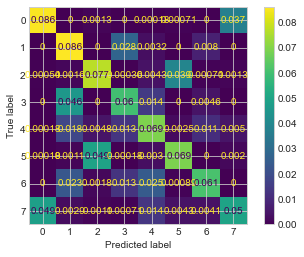

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='all')
# cmd = ConfusionMatrixDisplay(cm, display_labels=['business','health'])
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.savefig('90.png')

In [38]:
#import classification_report
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   b'AM-DSB'       0.63      0.69      0.66       700
   b'AM-SSB'       0.48      0.69      0.57       700
     b'BPSK'       0.57      0.62      0.59       700
    b'CPFSK'       0.52      0.48      0.50       700
     b'GFSK'       0.52      0.55      0.54       700
     b'PAM4'       0.59      0.55      0.57       700
     b'QPSK'       0.68      0.49      0.57       700
     b'WBFM'       0.52      0.40      0.45       700

    accuracy                           0.56      5600
   macro avg       0.57      0.56      0.56      5600
weighted avg       0.57      0.56      0.56      5600



In [29]:
import pandas as pd
data = [[-20, 1,13.3], [-18, 38,13.5],[-16,89,12.9],[-14,9,13.5],[-12,94,13.3],[-10,84,14.2],[-8,17,16.7],[-6,99,22.2],[-4,94,29.1],[-2,71,34.8],[0,24,40.2],[2,26,46.5],[4,22,49.8],[6,7,52.9],[8,15,54.8],[10,13,54.7],[12,15,57],[14,13,56.8],[16,7,57.2],[18,7,58.9]]
pd.DataFrame(data, columns=["SNR", "K ", "Accuracy"])

SNR  K   Accuracy
0   -20   1      13.3
1   -18  38      13.5
2   -16  89      12.9
3   -14   9      13.5
4   -12  94      13.3
5   -10  84      14.2
6    -8  17      16.7
7    -6  99      22.2
8    -4  94      29.1
9    -2  71      34.8
10    0  24      40.2
11    2  26      46.5
12    4  22      49.8
13    6   7      52.9
14    8  15      54.8
15   10  13      54.7
16   12  15      57.0
17   14  13      56.8
18   16   7      57.2
19   18   7      58.9

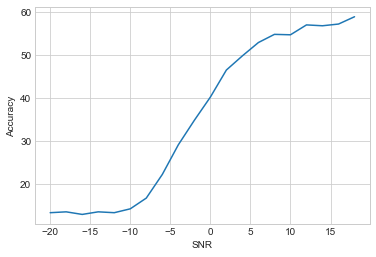

In [34]:
Accuracy = [13.3,13.5,12.9,13.5,13.3,14.2,16.7,22.2,29.1,34.8,40.2,46.5,49.8,52.9,54.8,54.7,57,56.8,57.2,58.9]
SNR = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]

plt.plot(SNR,Accuracy)
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.savefig('1000.png')

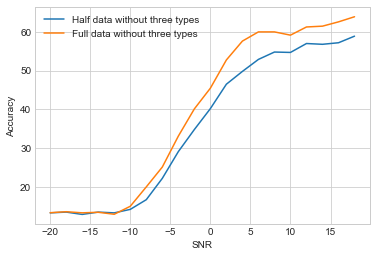

In [3]:
Accuracy = [13.34,13.6,13.31,13.45,12.94,15,20,25.12,33.097,40.125,45.47,52.76,57.625,60,60,59.16,61.27,61.48,62.59,63.91]
SNR = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]


Accuracy1 = [13.3,13.5,12.9,13.5,13.3,14.2,16.7,22.2,29.1,34.8,40.2,46.5,49.8,52.9,54.8,54.7,57,56.8,57.2,58.9]
SNR1 = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]

plt.plot(SNR1,Accuracy1,label='Half data without three types')
plt.plot(SNR,Accuracy,label='Full data without three types')
plt.legend()
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.savefig('1k.png')

In [ ]:
> plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4], label='first plot')
>>> plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16], label='second plot')